# D8 - Building fires in Estonia
## Karolin Kivilaan, Kati Ilus, Geitrud Pank

In [126]:
import numpy as np
import pandas as pd
import apyori
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data_df = pd.read_csv("hoonetulekahjud.csv")
data = data_df.values
data_df

,Maakond,Aasta,Hoone liik,Tekkepõhjus,Kuu,Hoonetulekahjud
0,Valga maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
1,Tartu maakond,2014,Mitteeluhooned,!Sisestamata!,3,3
2,Rapla maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
3,Lääne maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
4,Harju maakond,2014,Mitteeluhooned,!Sisestamata!,3,2
...,...,...,...,...,...,...
5660,Ida-Viru maakond,2020,!Sisestamata!,!Sisestamata!,11,1
5661,Ida-Viru maakond,2020,Eluhooned,Lahtise tule kasutamisel,11,1
5662,Harju maakond,2020,!Sisestamata!,!Sisestamata!,11,1
5663,Harju maakond,2020,Eluhooned,!Sisestamata!,11,1


### Basic plotting

In [127]:
year2014 = []
year2015 = []
year2016 = []
year2017 = []
year2018 = []
year2019 = []
year2020 = []
for i in data:
    if i[1] == 2014:
        year2014.append(i)
    elif i[1] == 2015:
        year2015.append(i)
    elif i[1] == 2016:
        year2016.append(i)
    elif i[1] == 2017:
        year2017.append(i)
    elif i[1] == 2018:
        year2018.append(i)
    elif i[1] == 2019:
        year2019.append(i)
    elif i[1] == 2020:
        year2020.append(i)
#print(year2014)

In [128]:
def fires_in_a_year(year):
    counter = 0
    for i in year:
        counter += int(i[5])
    return counter
print(fires_in_a_year(year2016))

1401


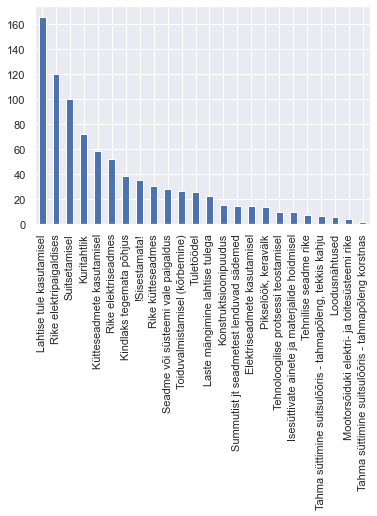

In [129]:
def different_causes(year):
    array = []
    for i in year:
        for j in range(i[5]):
            array.append(i[3])
    return array
o = pd.Index(different_causes(year2020))
o.value_counts().plot(kind='bar')
plt.show()

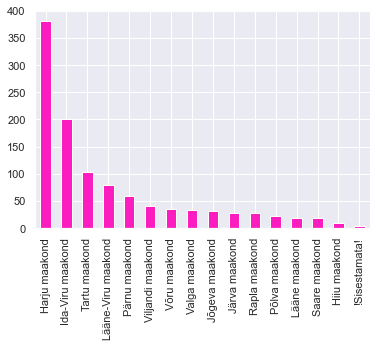

In [130]:
def fires_by_county(year):
    array = []
    for i in year:
        for j in range(i[5]):
            array.append(i[0])
    return array
y2019 = pd.Index(fires_by_county(year2019))
y2019.value_counts().plot(kind='bar', color='#fb1dbf')
plt.show()

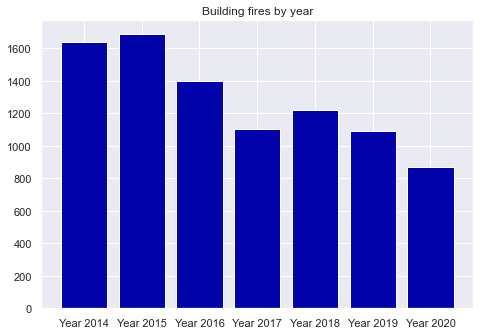

In [131]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Year 2014', 'Year 2015', 'Year 2016', 'Year 2017', 'Year 2018', 'Year 2019', 'Year 2020']
counts = [fires_in_a_year(year2014), fires_in_a_year(year2015), fires_in_a_year(year2016), fires_in_a_year(year2017), fires_in_a_year(year2018), fires_in_a_year(year2019), fires_in_a_year(year2020)] 
ax.bar(langs,counts, color='#0203aa')
ax.set_title('Building fires by year')
plt.show()

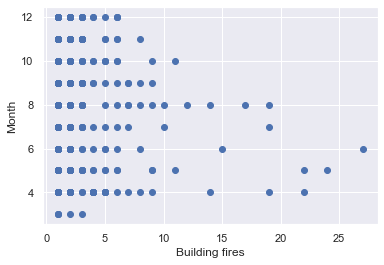

In [132]:
#Clustering fires by month
k = data_df.loc[data_df['Aasta'] == 2014]
plt.scatter(k['Hoonetulekahjud'], k['Kuu'])
plt.xlabel('Building fires')
plt.ylabel('Month')
plt.show()